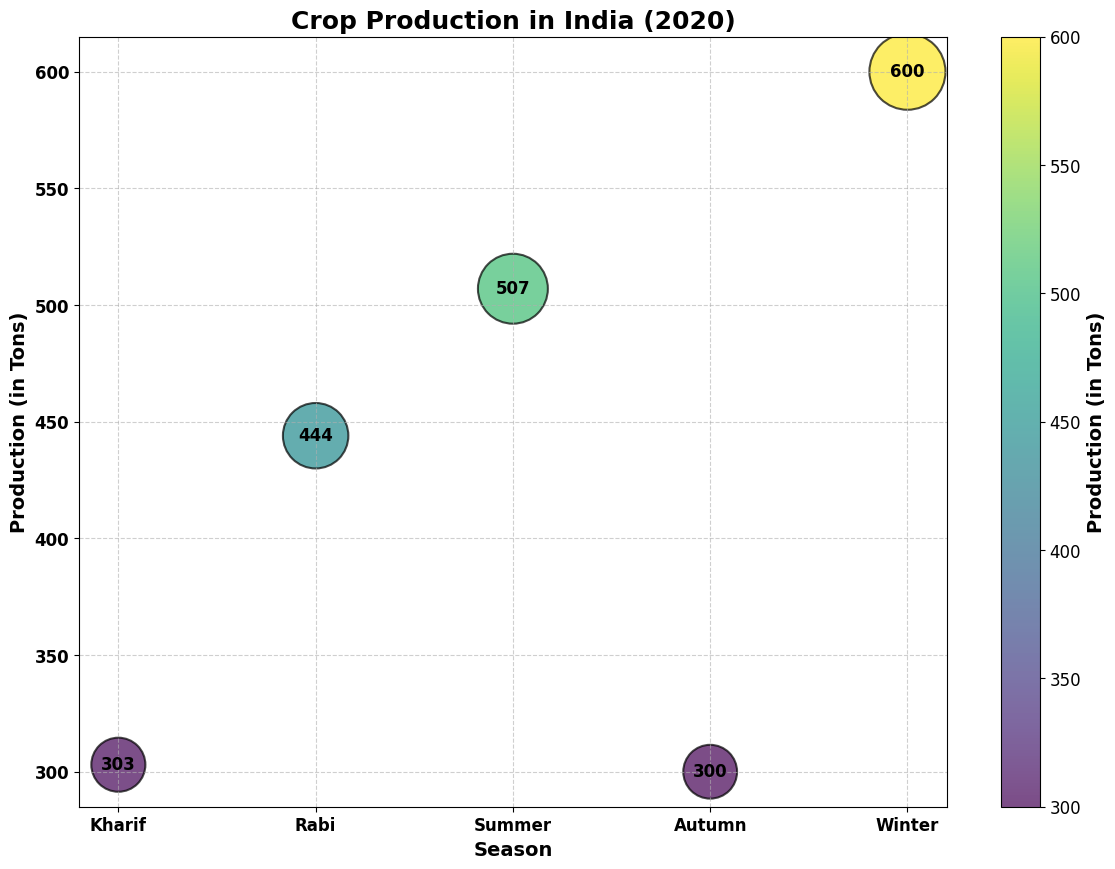

In [84]:
import matplotlib.pyplot as plt

# Data
seasons = ["Kharif", "Rabi", "Summer", "Autumn", "Winter"]
production = [303, 444, 507, 300, 600]
bubble_sizes = [1515, 2220, 2535, 1500, 3000]  # Predefined bubble sizes

# Creating the bubble plot
plt.figure(figsize=(14, 10))
scatter = plt.scatter(seasons, production, s=bubble_sizes, alpha=0.7, c=production, cmap='viridis', edgecolors="black", linewidth=1.5)

# Adding labels and title
plt.xlabel("Season", fontsize=14, fontweight='bold')
plt.ylabel("Production (in Tons)", fontsize=14, fontweight='bold')
plt.title("Crop Production in India (2020)", fontsize=18, fontweight='bold')

# Adding grid and customize ticks
plt.grid(True, linestyle='--', alpha=0.6)
plt.xticks(fontsize=12, fontweight='bold')
plt.yticks(fontsize=12, fontweight='bold')

# Adding color bar
cbar = plt.colorbar(scatter)
cbar.set_label('Production (in Tons)', fontsize=14, fontweight='bold')
cbar.ax.tick_params(labelsize=12)

# Annotating each bubble with the production value
for i, txt in enumerate(production):
    plt.annotate(txt, (seasons[i], production[i]), fontsize=12, fontweight='bold', ha='center', va='center')

# Showing the plot
plt.show()


In [85]:
import plotly.express as px
import pandas as pd

# Data
data = pd.DataFrame({
    "Season": ["Kharif", "Rabi", "Summer", "Autumn", "Winter"],
    "Production": [303, 444, 507, 300, 600]
})

# Bubble Plot
fig = px.scatter( data, x="Season", y="Production", size="Production", color="Season", title="Crop Production in India (2020)", 
                labels={"Production": "Production (in Tons)", "Season": "Season"}, template="plotly_white"
)

fig.update_layout(
    title_font=dict(size=24, family='Arial, sans-serif', color='black'),
    xaxis_title_font=dict(size=18, family='Arial, sans-serif', color='black'), yaxis_title_font=dict(size=18, family='Arial, sans-serif', color='black'),
    legend_title_font=dict(size=16, family='Arial, sans-serif', color='black'), font=dict(size=14, family='Arial, sans-serif', color='black'),
    margin=dict(l=40, r=40, t=80, b=40),
    paper_bgcolor='white', plot_bgcolor='white'
)

# Customizing the markers
fig.update_traces(marker=dict(line=dict(color='DarkSlateGrey', width=2)))

# Adding annotations
for i, row in data.iterrows():
    fig.add_annotation(
        x=row['Season'], y=row['Production'],
        text=str(row['Production']),
        showarrow=True, arrowhead=2,
        ax=0, ay=-30,
        font=dict(size=12, color='black', family='Arial, sans-serif')
    )

fig.show()


In [86]:
import pandas as pd
import plotly.graph_objects as go

# Loading the data
file_path = "C:/Users/bisma/Downloads/Covid19_Odisha.csv"
data = pd.read_csv(file_path)

# Sorting by Confirmed cases and select the top 10 districts
top_10_districts = data.sort_values(by="Confirmed", ascending=False).head(10)

# Creating a stacked bar chart
fig = go.Figure()

fig.add_trace(go.Bar(name="Confirmed", x=top_10_districts["District"], y=top_10_districts["Confirmed"], marker_color='blue'))
fig.add_trace(go.Bar(name="Active", x=top_10_districts["District"], y=top_10_districts["Active"], marker_color='orange'))
fig.add_trace(go.Bar(name="Recovered", x=top_10_districts["District"], y=top_10_districts["Recovered"], marker_color='green'))
fig.add_trace(go.Bar(name="Deceased", x=top_10_districts["District"], y=top_10_districts["Deceased"], marker_color='red'))


fig.update_layout(
    barmode="stack",
    title="Covid-19 Data for Top 10 Districts in Odisha", xaxis_title="Districts", yaxis_title="Number of Cases", legend_title="Case Type",
    template="plotly_white",
    title_font=dict(size=24, family='Arial, sans-serif', color='black'), xaxis_title_font=dict(size=18, family='Arial, sans-serif', color='black'),
    yaxis_title_font=dict(size=18, family='Arial, sans-serif', color='black'), legend_title_font=dict(size=16, family='Arial, sans-serif', color='black'), 
    font=dict(size=14, family='Arial, sans-serif', color='black'),
    margin=dict(l=40, r=40, t=80, b=40),
    paper_bgcolor='white', plot_bgcolor='white'
)

fig.show()


In [87]:
from dash import Dash, dcc, html
import pandas as pd
import plotly.graph_objects as go

# Loading the data
data = pd.read_csv("C:/Users/bisma/Downloads/Covid19_Odisha.csv")

# Sorting by Confirmed cases and select the top 10 districts
top_10_districts = data.sort_values(by="Confirmed", ascending=False).head(10)

# Creating a stacked bar chart
fig = go.Figure()

fig.add_trace(go.Bar(name="Confirmed", x=top_10_districts["District"], y=top_10_districts["Confirmed"], marker_color='#1f77b4'))
fig.add_trace(go.Bar(name="Active", x=top_10_districts["District"], y=top_10_districts["Active"], marker_color='#ff7f0e'))
fig.add_trace(go.Bar(name="Recovered", x=top_10_districts["District"], y=top_10_districts["Recovered"], marker_color='#2ca02c'))
fig.add_trace(go.Bar(name="Deceased", x=top_10_districts["District"], y=top_10_districts["Deceased"], marker_color='#d62728'))

fig.update_layout(
    barmode="stack",
    title="Covid-19 Data for Top 10 Districts in Odisha", xaxis_title="Districts", yaxis_title="Number of Cases", legend_title="Case Type",
    template="plotly_white",
    title_font=dict(size=24, family='Arial, sans-serif', color='#333'), yaxis_title_font=dict(size=18, family='Arial, sans-serif', color='#333'),
    legend_title_font=dict(size=16, family='Arial, sans-serif', color='#333'), font=dict(size=14, family='Arial, sans-serif', color='#333'),
    margin=dict(l=40, r=40, t=80, b=40), paper_bgcolor='#f9f9f9', plot_bgcolor='#f9f9f9'
)

app = Dash(__name__)

app.layout = html.Div([
    html.Div([
        html.H1("Covid-19 Dashboard: Top 10 Districts in Odisha", style={'textAlign': 'center', 'color': '#333', 'fontFamily': 'Arial, sans-serif'}),
        html.Hr(style={'borderColor': '#333'}), dcc.Graph(figure=fig)
    ], style={'padding': '20px', 'backgroundColor': '#ffffff', 'borderRadius': '10px', 'boxShadow': '0 4px 8px rgba(0, 0, 0, 0.1)'})
], style={'maxWidth': '1200px', 'margin': '0 auto', 'padding': '20px', 'backgroundColor': '#f0f0f0'})

if __name__ == "__main__":
    app.run_server(debug=True)

C:\Users\bisma\AppData\Local\Temp\ipykernel_21680\2029447111.py:8: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


C:\Users\bisma\AppData\Local\Temp\ipykernel_21680\2029447111.py:23: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



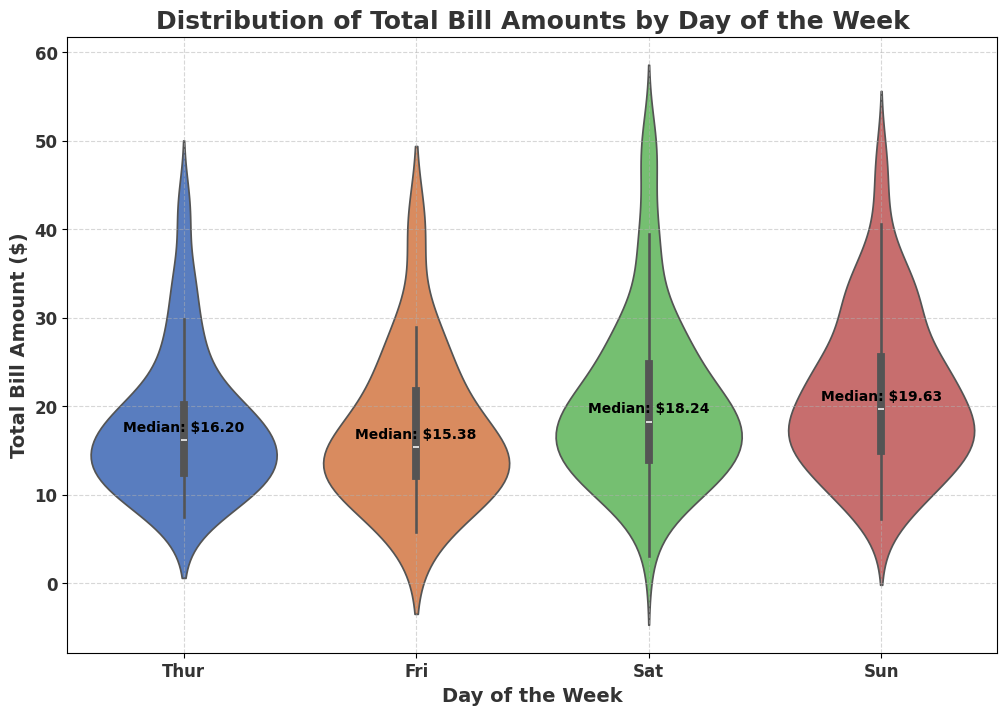

In [88]:
import seaborn as sns
import matplotlib.pyplot as plt

# Loading the dataset from tips dataset in seaborn available in github
tips = sns.load_dataset("tips")

plt.figure(figsize=(12, 8))
sns.violinplot(x="day", y="total_bill", data=tips, palette="muted")

# Adding title and labels with custom fonts and sizes
plt.title("Distribution of Total Bill Amounts by Day of the Week", fontsize=18, fontweight='bold', color='#333')
plt.xlabel("Day of the Week", fontsize=14, fontweight='bold', color='#333')
plt.ylabel("Total Bill Amount ($)", fontsize=14, fontweight='bold', color='#333')

# Adding grid with custom style
plt.grid(True, linestyle="--", alpha=0.5)

# Customizing ticks
plt.xticks(fontsize=12, fontweight='bold', color='#333')
plt.yticks(fontsize=12, fontweight='bold', color='#333')

# Adding annotations for median values
medians = tips.groupby(['day'])['total_bill'].median().values
for i, median in enumerate(medians):
    plt.text(i, median + 1, f'Median: ${median:.2f}', horizontalalignment='center', size='medium', color='black', weight='semibold')

# Showing the plot
plt.show()
